### Objective:
- To implement logistic regression in python with any libraries and get a feel for the data.
- The data is part of Andrew Ng's Machine Learning course.

In [11]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the data

In [5]:
import os
path = os.getcwd() + '\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Explore the data

In [6]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


#### Let's take a look at the distribution of the variables

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC3FD57320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001AC3FD625F8>], dtype=object)

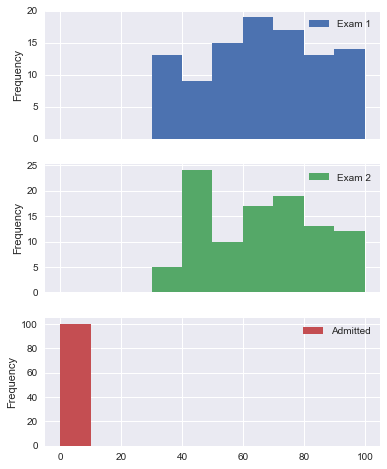

In [14]:
data.plot(kind='hist', subplots=True, figsize=[6,8])

#### Plotting the variables and researching if there is a clear decision boundary
There's a clear boundary based on Exam 1 and 2.

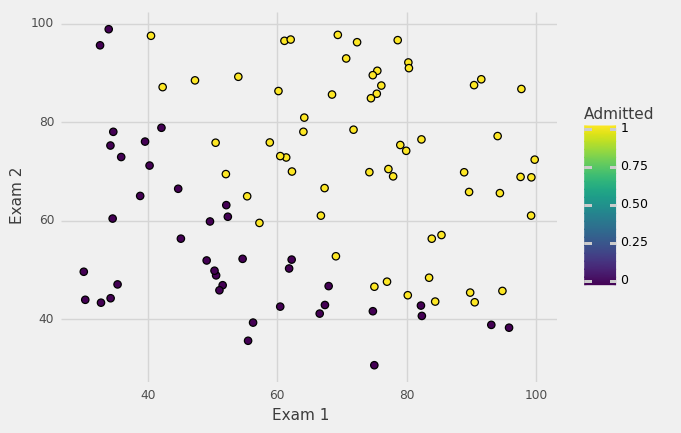

<ggplot: (114959758277)>

In [29]:
from plotnine import *
(ggplot(data=data) + 
 aes(x='Exam 1', y='Exam 2', fill=str('Admitted')) + 
 geom_point(size=2.5) + theme_538()
)

### Creating the sigmoid function
- converts any input to a value between 0 to 1.
- This is how we convert the numerical input to probabilities of a particular class.
- np.exp gives us the e^x where x is any value and e is Euler's number (approximately 2.718)


In [30]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

##### Let's see a sample of what it can do!

In [41]:
nums = np.arange(-10,10, step=1)
nums

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

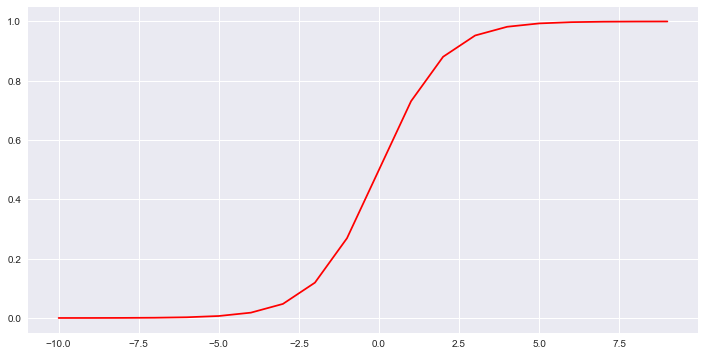

In [54]:
fig, ax = plt.subplots(figsize=(12,6))  
ax.plot(nums, sigmoid(nums), 'r')  

### Cost function

In [160]:
def cost(theta, X, y):
    
    #Theta is the weight or the parameter than we trying to find to find the deicison boundary.
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    h = sigmoid(X * theta.T)

    part1 = np.multiply(-y, np.log(h))
    part2 = np.multiply((1 - y), np.log(1 - h))

    return np.sum(part1 - part2) / len(X)

In [94]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0,'Ones',1)

ValueError: cannot insert Ones, already exists

In [96]:
# set X (training data) and y (target variable)
cols = data.shape[1]

# The training datset contains all rows and the columns ones and the other variables
X = data.iloc[:, 0:cols - 1]
# Target variables
y = data.iloc[:, cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)

# one value for each training predictor variable data
theta = np.zeros(cols-1)

In [97]:
X.shape, theta.shape, y.shape 

((100, 3), (3,), (100, 1))

In [161]:
cost(theta,X,y)

0.69314718055994529

### Gradient Function
This tells us a single step of the gradient descent

In [125]:
def gradient(theta, X, y):
    
    #Preparing the input data
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    #Getting the count of paramters to be computed.
    parameters = int(theta.ravel().shape[1])
    
    # This houses the gradient from one step
    grad = np.zeros(parameters)
    
    h= sigmoid(X*theta.T)
    
    error = h- y
    
    for i in range(paramters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term)/ len(X)
    
    return grad

### Finding the optimal parameters of the function

In [135]:
import scipy.optimize as opt
# Getting the optmized theta values for each variable (including the dummy column)
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
# Getting the cost based on the optimized theta
cost(result[0], X, y)  

0.20349770158947425

In [143]:
def predict (theta,X):
    #Get the probabilites for each observation
    probability = sigmoid(X*theta.T)
    return [1 if x >=0.5 else 0 for x in probability]

In [144]:
#Updating theta with the optimized values 
theta_opt = np.matrix(result[0])

In [150]:
# Get the predictions
predictions = predict(theta_opt,X)

#Correct flag
correct = [1 if( (a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]

#Calculating accuracy
sum(correct)/len(correct)

0.89

## Logistic Regression with Regularization
Regularization is a term in the cost function that causes the algorithm to prefer "simpler" models (in this case, models will smaller coefficients). The theory is that this helps to minimize overfitting and improve the model's ability to generalize.

### Cost Function including Regularization term

In [157]:
def cost_reg(theta, X, y, learningRate):
    
    #Theta is the weight or the parameter than we trying to find to find the deicison boundary.
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    h = sigmoid(X * theta.T)

    part1 = np.multiply(-y, np.log(h))
    part2 = np.multiply((1 - y), np.log(1 - h))
    
    #times the learning rate
    reg = (learningRate/2*len(X))* np.sum(np.power(theta[:, 1:theta.shape[1]],2))

    return np.sum(part1 - part2) / len(X) + reg

In [164]:
cost_reg(theta, X,y, learningRate=0.01)

0.69314718055994529

### Gradient Function with Regularization term

In [168]:
def gradient_reg(theta, X, y, learningRate):
    
    #Preparing the input data
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    #Getting the count of paramters to be computed.
    parameters = int(theta.ravel().shape[1])
    
    # This houses the gradient from one step
    grad = np.zeros(parameters)
    
    h= sigmoid(X*theta.T)
    
    error = h- y
    
    for i in range(paramters):
        term = np.multiply(error, X[:,i])
        
        # The bias/intercept term should not be regularized
        if i==0:
            grad[i] = np.sum(term)/ len(X)
        # The rest of the variables must be
        else:
            grad[i] = np.sum(term)/ len(X) + (learningRate/len(X)) *theta[:,i]
    
    return grad

In [172]:
learningRate = 0.04
result1 = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(X,y, learningRate))
result1

(array([-14.97601931,   0.12528799,   0.11708513]), 100, 3)

In [174]:
theta_reg=np.matrix(result1[0])

In [177]:
predictions = predict(theta=theta_reg,X=X)

In [178]:
#Correct flag
correct = [1 if( (a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]

#Calculating accuracy
sum(correct)/len(correct)

0.89